[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

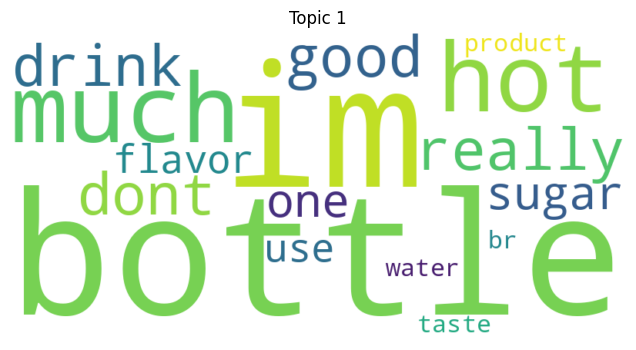

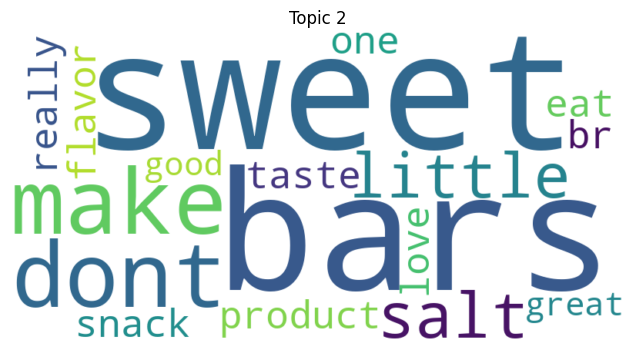

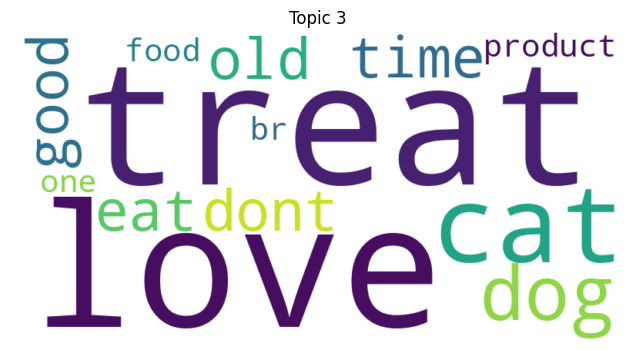

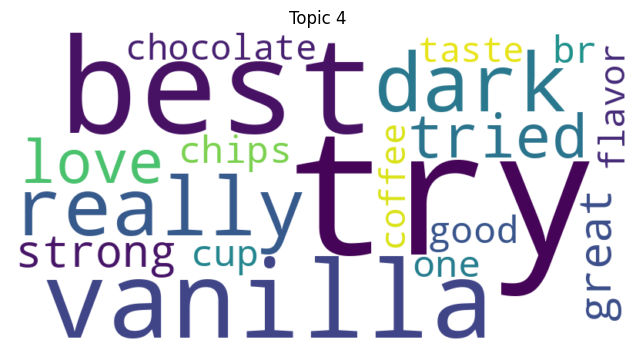

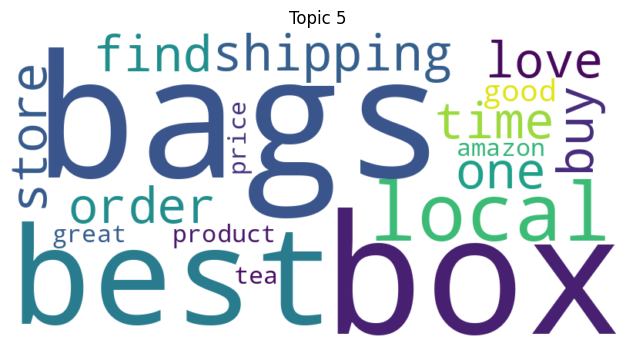

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv("Reviews.csv")
print(df.head())

# Select relevant column
df = df[['Text']].dropna()

# Text preprocessing
def preprocess_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing
df['cleaned_text'] = df['Text'].apply(preprocess_text)

# Convert text into a document-term matrix
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

# Train LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
def display_topics(model, feature_names, num_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))
        print()

display_topics(lda, vectorizer.get_feature_names_out(), 10)

# Word cloud visualization
for i, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
        " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {i + 1}")
    plt.show()
